# Salesforce Projects: Gantt Chart

In [1]:
%load_ext autoreload
%autoreload 2

## Importing modules

In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

from datetime import date, timedelta
from matplotlib.dates import YearLocator

warnings.filterwarnings('ignore')

## Opening data in pandas
### Setting date columns to date format and sorting.

In [3]:
df1 = pd.read_excel("../data/Copy of In Progress IT Team Projects-2023-04-16-11-08-17.xlsx")
df1["Calculated Start Date"] = pd.to_datetime(df1["Calculated Start Date"], format='%m/%d/%Y')
df1["Calculated End Date"] = pd.to_datetime(df1["Calculated End Date"], format='%m/%d/%Y')
df1.sort_values(by = ["Calculated End Date"])

,Project Status ↑,Project: Owner Name ↑,Unnamed: 2,Project: Project Name,Calculated Start Date,Calculated End Date,Description,Classification,Health,Status Updates,External Project View,rownum
27,In Progress,Ted Urbaniak,NaN,Town Hall Campus Kiosk,2021-01-01,2021-04-30,This is an experimental kiosk that will be pla...,NaN,Green,Updated 10/26/21 No updates expected until res...,External Project View,28
10,In Progress,Cheron Gilchrist,NaN,ERP Assessment - Project Epic Trek,2021-08-02,2021-11-19,Phase 1 - Assessment involves partnering with ...,Strategic,Green,Week ending 4/14/2023: Accomplishments: [[ Ste...,External Project View,11
28,In Progress,Ted Urbaniak,NaN,LoRa Network,2021-09-09,2022-03-31,Deploy a LoRa network in the Town of cary as a...,NaN,Green,Accomplishments: 05/12/22 Everynet PO has been...,External Project View,29
17,In Progress,Cheron Gilchrist,NaN,MFP Printer Upgrades - HOLD,2022-03-14,2022-04-26,We are currently in the gathering data phase o...,Upgrade,Green,NaN,External Project View,18
13,In Progress,Cheron Gilchrist,NaN,Okta Verify MFA,2020-11-02,2022-05-13,Promote the enrollment for Okta Verify Multi-F...,Strategic,Red,*Risk identified in Health Summary* Week endin...,External Project View,14
8,In Progress,Cheron Gilchrist,NaN,PD Paperless Processes - CLOSED,2021-06-07,2022-06-02,The purpose of this project is to establish a ...,NaN,Green,Week ending 4/14/2023: This project is closed ...,External Project View,9
42,In Progress,Tracey Winkler,NaN,Playsight Camera Install- On Hold,2022-05-02,2022-06-30,Cary tennis Park is looking to install more co...,New,Green,Status Update 9.8.22. \n I have scheduled a me...,External Project View,43
16,In Progress,Cheron Gilchrist,NaN,PRCR - Salesforce Implementation Phase 1,2021-07-01,2022-06-30,Implement new PRCR application to replace curr...,Maintenance,Red,Week ending3/03/2023: 3/1/23 – started Sprint ...,External Project View,17
18,In Progress,Cheron Gilchrist,NaN,Near Map - HOLD,2022-01-03,2022-06-30,6/14/22 - Project placed on hold as originator...,New,Green,Week ending 4/15/2022 Sent email to KatieRose ...,External Project View,19
20,In Progress,Cheron Gilchrist,NaN,Dog Park Gate Kicker,2021-06-30,2022-07-01,PRCR staff would like to replace existing gate...,New,Green,Week ending 3/10/2023: No updates this week \n...,External Project View,21


## Creating numeric columns from the dates
### Filtering to only show rows where the end date hasn't passed.

In [4]:
d1 = date.today()
d2 = d1.strftime("%m/%d/%Y")

df2 = (df1['Calculated End Date'] >= d2)
df3 = df1.loc[df2]

df3.sort_values(by = ["Calculated End Date"])

df3['daycount'] = df3['Calculated End Date'] - df3['Calculated Start Date']

# project start date
proj_start = df3['Calculated Start Date'].min()
# number of days from project start to task start
df3['start_num'] = (df3['Calculated Start Date']-proj_start).dt.days
# number of days from project start to end of tasks
df3['end_num'] = (df3['Calculated End Date']-proj_start).dt.days
# days between start and end of each task
df3['days_start_to_end'] = df3.end_num - df3.start_num

df3 = df3.rename(columns={"Project: Project Name": "proj_name"})

df3 = df3.sort_values('Calculated End Date', ascending = False)
df3

,Project Status ↑,Project: Owner Name ↑,Unnamed: 2,proj_name,Calculated Start Date,Calculated End Date,Description,Classification,Health,Status Updates,External Project View,rownum,daycount,start_num,end_num,days_start_to_end
33,In Progress,Tracey Winkler,NaN,Civil Design Laptops,2023-04-12,2026-05-01,Civil Design looking to upgrade the laptops fo...,Upgrade,Green,Status Updates by Tracey Winkler UPDATE : 4/1...,External Project View,34,1115 days,1015,2130,1115
22,In Progress,Joel Bonestell,NaN,SAS Visual Investigator,2022-03-01,2025-09-25,Leverage SAS visual analytics to develop a too...,NaN,Red,Status Update: 8.15.22 \n SAS has added a $23k...,External Project View,23,1304 days,608,1912,1304
41,In Progress,Tracey Winkler,NaN,Fiber Management Initiative- On Hold,2022-10-03,2024-08-01,We have 2 fiber Cable Plant owned and operated...,Maintenance,Green,This project will be on hold until we have the...,External Project View,42,668 days,824,1492,668
26,In Progress,Joel Bonestell,NaN,Enterprise Wi-Fi Expansion - On Hold,2022-04-05,2024-04-22,"Add wireless access to Jordan Hall, Bond Park ...",NaN,Green,Status Update: 10.11.22. I met with Joel on 10...,External Project View,27,748 days,643,1391,748
36,In Progress,Tracey Winkler,NaN,FD DOCTRACT,2023-03-01,2023-09-01,Policy Management Solution to track SOP (Stand...,New,Green,Status Updates by Tracey Winkler UPDATE : 4/...,External Project View,37,184 days,973,1157,184
43,In Progress,Tracey Winkler,NaN,SQL Database Cleanup,2021-03-30,2023-08-04,2008 and 2012 SQL databases will no longer be ...,Maintenance,Green,7/26/22 - Tw Emailed Madhavi to map out the se...,External Project View,44,857 days,272,1129,857
3,In Progress,Chasity Mitchell,NaN,NWN Hosted Phone Cloud Migration,2022-06-20,2023-07-18,Migration of the town's phone system to the NW...,Strategic,Green,04.12.2023 Accomplishments: Successful meeting...,External Project View,4,393 days,719,1112,393
34,In Progress,Tracey Winkler,NaN,FD MDC Replacement,2022-10-12,2023-07-12,Template for IT projects,Upgrade,Green,Status Updates by Tracey Winkler UPDATE: 4/4/...,External Project View,35,273 days,833,1106,273
2,In Progress,Chasity Mitchell,NaN,Ivey Ellington - Office Space Upfit,2023-03-20,2023-06-30,The Ivey Ellington house is moving to the old ...,Operational,Green,04.12.2023 Accomplishments: Successful site su...,External Project View,3,102 days,992,1094,102
12,In Progress,Cheron Gilchrist,NaN,SAS Viya 4,2023-01-02,2023-06-30,The purpose of this project is to establish a ...,Upgrade,Green,Week ending 3/31/3023: Met with SAS team to de...,External Project View,13,179 days,915,1094,179


## Creating the gantt chart

In [5]:
"""print(xticklabels)
print()
print(df3['Calculated Start Date'].min())
print(df3['Calculated End Date'].max())
print()
print(df3['Calculated End Date'].max().year - df3['Calculated Start Date'].min().year)
print(df3['Calculated End Date'].max() - df3['Calculated Start Date'].min())
print(2130/6)"""

"print(xticklabels)\nprint()\nprint(df3['Calculated Start Date'].min())\nprint(df3['Calculated End Date'].max())\nprint()\nprint(df3['Calculated End Date'].max().year - df3['Calculated Start Date'].min().year)\nprint(df3['Calculated End Date'].max() - df3['Calculated Start Date'].min())\nprint(2130/6)"

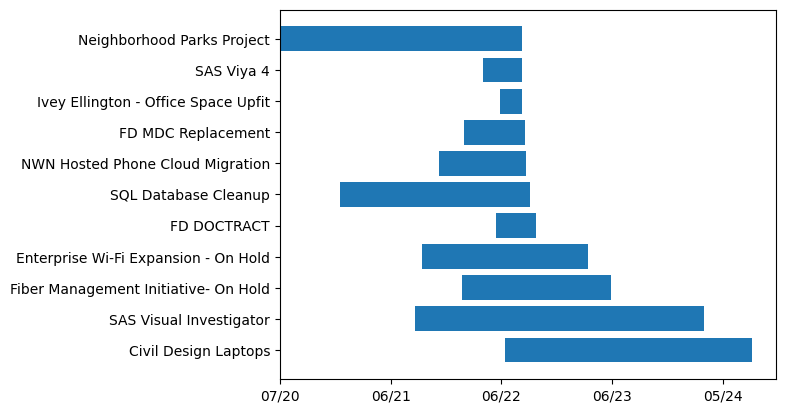

In [6]:
fig, ax = plt.subplots(1)
thegraph = ax.barh(df3['proj_name'], df3['days_start_to_end'], left=df3['start_num'])
plt.gca()

xticklabels = pd.date_range(start=df3['Calculated Start Date'].min(), end=df3['Calculated End Date'].max()).strftime("%m/%y")
plt.locator_params(nbins=7)
ax.set_xticklabels(xticklabels[::355])

for pY, pX in enumerate(df3['Calculated Start Date']):
    plt.annotate(pX, xy=(pX, pY))

plt.show()

## Change the number on the x-axis from days to dates

In [7]:
xticklabels = pd.date_range(start=df3['Calculated Start Date'].min(), end=df3['Calculated End Date'].max()).strftime("%m/%y")
ax.set_xticklabels(xticklabels[::355])

#plt.annotate('hi', (2,1))

plt.show()

## Today line

In [8]:
"""#ax.axvline(x=29)

plt.bar(color = "black")

plt.show()"""

'#ax.axvline(x=29)\n\nplt.bar(color = "black")\n\nplt.show()'

## Things to check/add:
- Line denoting today
- Sorting
- Confirm that the projects on the Gantt Chart are the ones needed to be shown

## Tracey's active projects (for data confirmation)

In [9]:
tracey = df3[df3['Project: Owner Name  ↑'] == 'Tracey Winkler']
tracey = df3.drop(df3.columns[[0, 1, 2, 6, 7, 8, 9, 10]], axis= 1)
tracey = tracey[tracey['Calculated End Date'] >= d2]
tracey

,proj_name,Calculated Start Date,Calculated End Date,rownum,daycount,start_num,end_num,days_start_to_end
33,Civil Design Laptops,2023-04-12,2026-05-01,34,1115 days,1015,2130,1115
22,SAS Visual Investigator,2022-03-01,2025-09-25,23,1304 days,608,1912,1304
41,Fiber Management Initiative- On Hold,2022-10-03,2024-08-01,42,668 days,824,1492,668
26,Enterprise Wi-Fi Expansion - On Hold,2022-04-05,2024-04-22,27,748 days,643,1391,748
36,FD DOCTRACT,2023-03-01,2023-09-01,37,184 days,973,1157,184
43,SQL Database Cleanup,2021-03-30,2023-08-04,44,857 days,272,1129,857
3,NWN Hosted Phone Cloud Migration,2022-06-20,2023-07-18,4,393 days,719,1112,393
34,FD MDC Replacement,2022-10-12,2023-07-12,35,273 days,833,1106,273
2,Ivey Ellington - Office Space Upfit,2023-03-20,2023-06-30,3,102 days,992,1094,102
12,SAS Viya 4,2023-01-02,2023-06-30,13,179 days,915,1094,179


In [10]:
for pY, pX in enumerate(df3['Calculated Start Date']):
    print(pX, pY)

2023-04-12 00:00:00 0
2022-03-01 00:00:00 1
2022-10-03 00:00:00 2
2022-04-05 00:00:00 3
2023-03-01 00:00:00 4
2021-03-30 00:00:00 5
2022-06-20 00:00:00 6
2022-10-12 00:00:00 7
2023-03-20 00:00:00 8
2023-01-02 00:00:00 9
2020-07-01 00:00:00 10


In [11]:
for pY, pX in enumerate(df3['Calculated End Date']):
    print(pX, pY)

2026-05-01 00:00:00 0
2025-09-25 00:00:00 1
2024-08-01 00:00:00 2
2024-04-22 00:00:00 3
2023-09-01 00:00:00 4
2023-08-04 00:00:00 5
2023-07-18 00:00:00 6
2023-07-12 00:00:00 7
2023-06-30 00:00:00 8
2023-06-30 00:00:00 9
2023-06-30 00:00:00 10


In [12]:
for barz in thegraph:
    print(barz)

Rectangle(xy=(1015, -0.4), width=1115, height=0.8, angle=0)
Rectangle(xy=(608, 0.6), width=1304, height=0.8, angle=0)
Rectangle(xy=(824, 1.6), width=668, height=0.8, angle=0)
Rectangle(xy=(643, 2.6), width=748, height=0.8, angle=0)
Rectangle(xy=(973, 3.6), width=184, height=0.8, angle=0)
Rectangle(xy=(272, 4.6), width=857, height=0.8, angle=0)
Rectangle(xy=(719, 5.6), width=393, height=0.8, angle=0)
Rectangle(xy=(833, 6.6), width=273, height=0.8, angle=0)
Rectangle(xy=(992, 7.6), width=102, height=0.8, angle=0)
Rectangle(xy=(915, 8.6), width=179, height=0.8, angle=0)
Rectangle(xy=(0, 9.6), width=1094, height=0.8, angle=0)


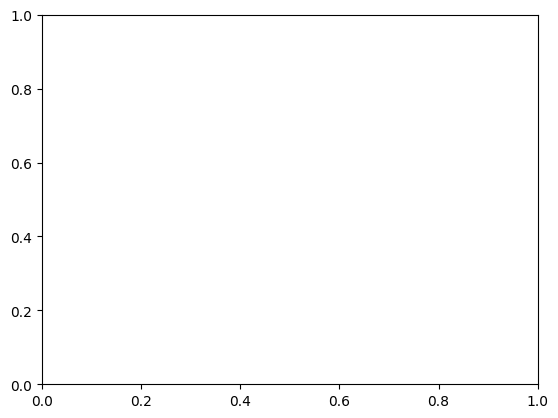

In [13]:
"""for barz in thegraph:
    width = barz.get_width()
    plt.annotate(f'{width}', xy = )"""

plt.annotate("min val", xy=(5,1))

plt.show()

## Fix for x-axis

##### Remove the values from the x-axis and place start dates and end dates to the left and right of the bars.